# 1. SNR and Binning

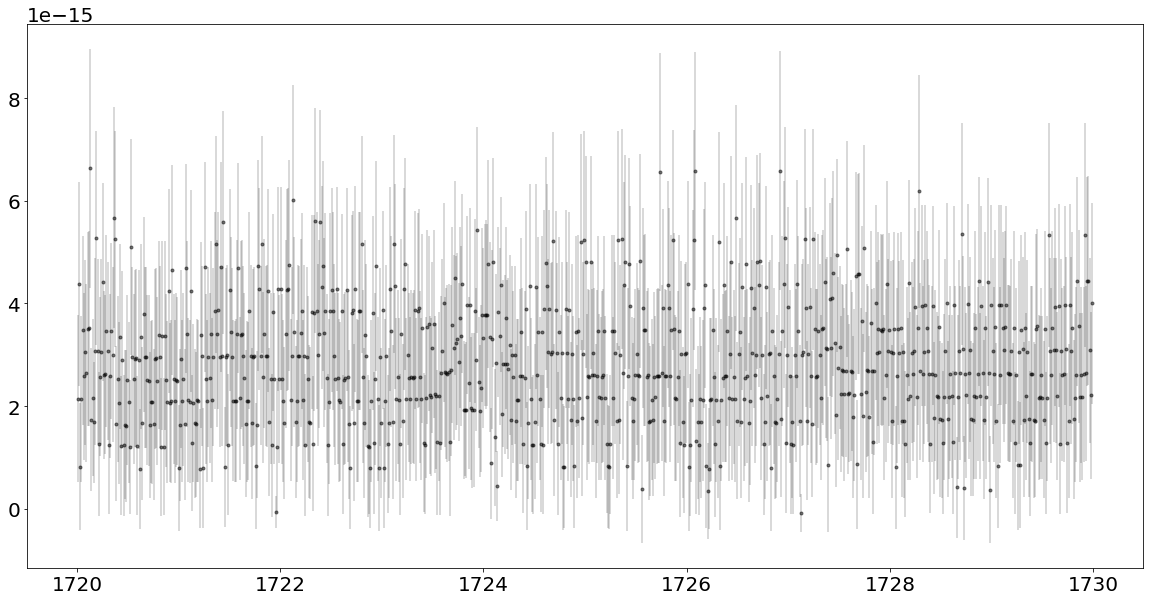

In [22]:
i = 0
wvln, flux, fluxErr, dataQual, segment = fuv_x1d_data[i]["WAVELENGTH"], fuv_x1d_data[i]["FLUX"],\
    fuv_x1d_data[i]["ERROR"], fuv_x1d_data[i]["DQ"], fuv_x1d_data[i]["SEGMENT"]
plt.figure(figsize=(20, 10))
snr_range_mask = (wvln>1720) & (wvln< 1730)
markers, caps, bars = plt.errorbar(wvln[snr_range_mask], flux[snr_range_mask], fluxErr[snr_range_mask], 
                                   linestyle = '',marker = '.', c = 'k')
[bar.set_alpha(0.2) for bar in bars]
markers.set_alpha(0.5)#(0.2) for marker in markers]

In [1]:
fig, (ax0,ax1) = plt.subplots(2, 1,figsize = (10, 8))

for i in range(2):
    weighted_binned_flux = downsample_1d(myarr = fuv_x1d_data[i]["FLUX"], weightsarr= (fuv_x1d_data[i]["GCOUNTS"]/fuv_x1d_data[i]["GROSS"]) , factor =  6)
    unweighted_binned_flux = downsample_1d(myarr = fuv_x1d_data[i]["FLUX"] , weighted = False, factor =  6)

    ###
    if i == 0:
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),weighted_binned_flux, c = 'k', label = "Weighted Binned by 6")
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),unweighted_binned_flux, c = 'r',alpha = 0.5, label = "Un-weighted Binned by 6")

    else:
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),weighted_binned_flux, c = 'k')
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),unweighted_binned_flux, c = 'r',alpha = 0.5)

        
        
    ax0.legend(fontsize = 16)

    ax1.scatter(fuv_x1d_data[i]["WAVELENGTH"], fuv_x1d_data[i]["DQ"], s = 0.5, alpha = (1 - 0.9*i))
    ax1.set_ylabel("DQ flag")

NameError: name 'plt' is not defined

In [8]:
import numpy as np

In [17]:
[True, False, False, True, True, False] and [True, False, True, True, False, False]

[True, False, True, True, False, False]

In [581]:
def my_weighted_average(arr, weights, axis):
    if np.sum(weights) == 0:
        return 0
    elif np.sum(weights) != 0: 
        return np.average(arr, weights = weights, axis = axis)
    else:
        print("SOMETHING IS VERY WRONG")

/Users/nkerman/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/nkerman/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


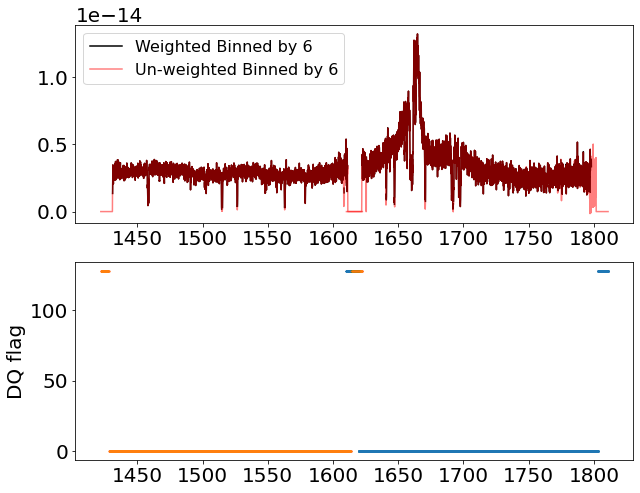

In [600]:
fig, (ax0,ax1) = plt.subplots(2, 1,figsize = (10, 8))

for i in range(2):
    weighted_binned_flux = downsample_1d(myarr = fuv_x1d_data[i]["FLUX"], weightsarr= (fuv_x1d_data[i]["GCOUNTS"]/fuv_x1d_data[i]["GROSS"]) , factor =  6)
    unweighted_binned_flux = downsample_1d(myarr = fuv_x1d_data[i]["FLUX"] , weighted = False, factor =  6)

    ###
    if i == 0:
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),weighted_binned_flux, c = 'k', label = "Weighted Binned by 6")
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),unweighted_binned_flux, c = 'r',alpha = 0.5, label = "Un-weighted Binned by 6")

    else:
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),weighted_binned_flux, c = 'k')
        ax0.plot(downsample_1d(fuv_x1d_data[i]["WAVELENGTH"], factor = 6, weighted = False),unweighted_binned_flux, c = 'r',alpha = 0.5)

        
        
    ax0.legend(fontsize = 16)

    ax1.scatter(fuv_x1d_data[i]["WAVELENGTH"], fuv_x1d_data[i]["DQ"], s = 0.5, alpha = (1 - 0.9*i))
    ax1.set_ylabel("DQ flag")

In [ ]:
np.seterr(divide='ignore', invalid='ignore') #, category=np.VisibleDeprecationWarning) 

function `BinByResel` is Binning by 6


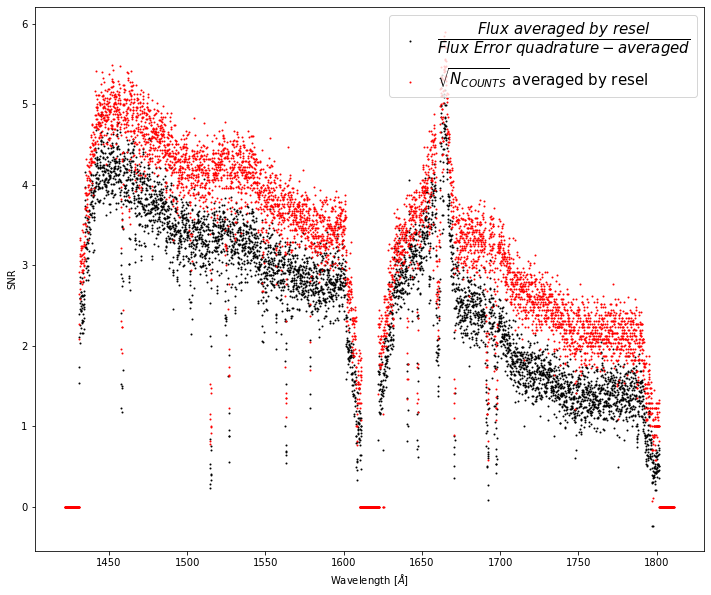

In [346]:
table_ = binByResel(fuv_x1d_data, binsize=6)
plt.figure(figsize = (12,10))
for i in range(len(table_)):
    if i == 0:
        plt.scatter(table_[i]["WAVELENGTH"], table_[i]["FLUX"]/table_[i]["ERROR"],
                   s = 1, c = 'k', label = "$\dfrac{Flux\ averaged\ by\ resel}{Flux\ Error\ quadrature-averaged}$")

        rtCts = np.sqrt(table_[i]['GCOUNTS'])
        plt.scatter(table_[i]["WAVELENGTH"], rtCts,
                   s = 1, c = 'r', label = '$\sqrt{N_{COUNTS}}$ averaged by resel')
    else:
        plt.scatter(table_[i]["WAVELENGTH"], table_[i]["FLUX"]/table_[i]["ERROR"],
                   s = 1, c = 'k')

        rtCts = np.sqrt(table_[i]['GCOUNTS'])
        plt.scatter(table_[i]["WAVELENGTH"], rtCts,
                   s = 1, c = 'r')
        
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("SNR")
plt.savefig(plotsdir+"misc/SNR_Methods.png", dpi = 400)

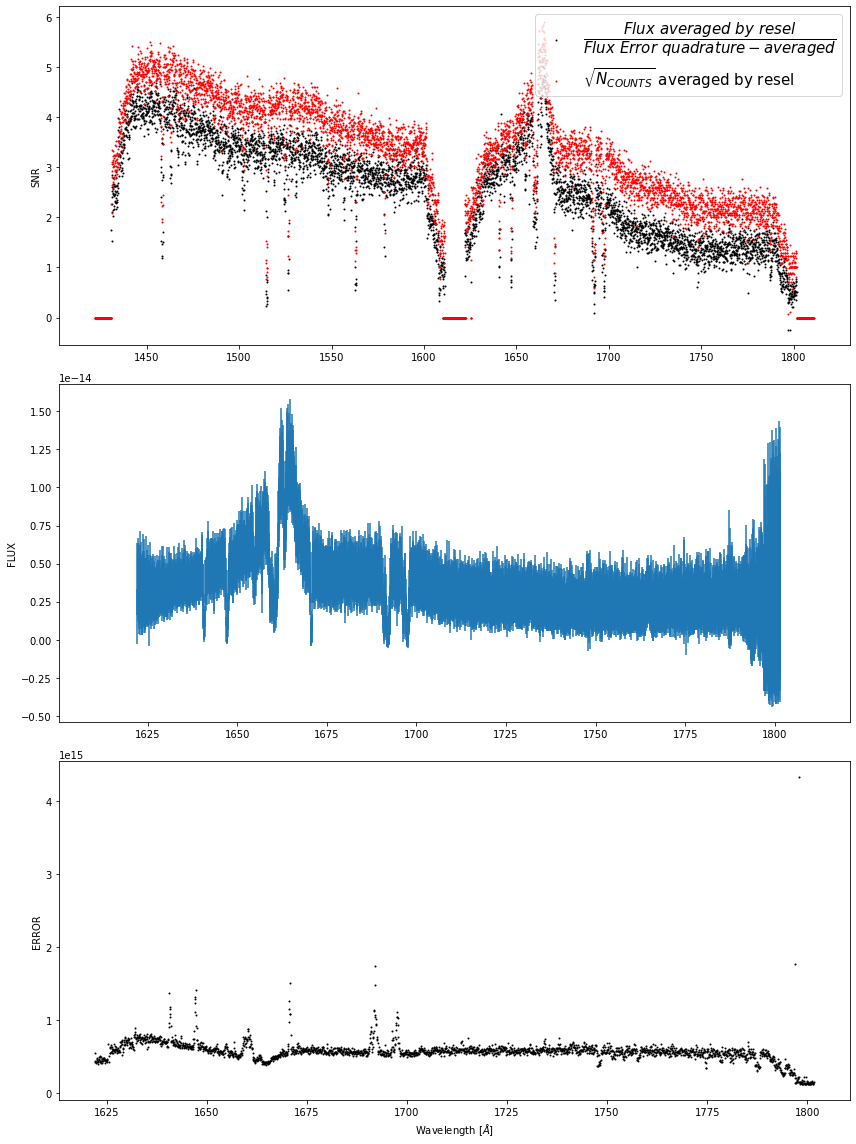

In [350]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize = (12, 16))

for i in range(len(table_)):
    if i == 0:
        ax0.scatter(table_[i]["WAVELENGTH"], table_[i]["FLUX"]/table_[i]["ERROR"],
                   s = 1, c = 'k', label = "$\dfrac{Flux\ averaged\ by\ resel}{Flux\ Error\ quadrature-averaged}$")

        rtCts = np.sqrt(table_[i]['GCOUNTS'])
        ax0.scatter(table_[i]["WAVELENGTH"], rtCts,
                   s = 1, c = 'r', label = '$\sqrt{N_{COUNTS}}$ averaged by resel')
    else:
        ax0.scatter(table_[i]["WAVELENGTH"], table_[i]["FLUX"]/table_[i]["ERROR"],
                   s = 1, c = 'k')

        rtCts = np.sqrt(table_[i]['GCOUNTS'])
        ax0.scatter(table_[i]["WAVELENGTH"], rtCts,
                   s = 1, c = 'r')
        

ax1.errorbar(table_[0]["WAVELENGTH"],table_[0]["FLUX"],table_[0]["ERROR"],
             linestyle = "")

ax2.scatter(table_[0]["WAVELENGTH"],1/table_[0]["ERROR"],
           s = 1, c = 'k')

ax0.legend(fontsize = 15)
ax0.set_ylabel("SNR")
ax1.set_ylabel("FLUX")
ax2.set_ylabel("ERROR")
ax2.set_xlabel("Wavelength [$\AA$]")
plt.tight_layout()
plt.savefig("//Users/nkerman/Documents/Plots/misc/"+"SNR_Methods2.png", dpi = 400)